## Survey of Consumer Finances

Example using public microdata

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np

path = '/home/brian/Documents/SCF/data/'

In [55]:
result = pd.DataFrame()
for year in [2016, 2019]:
    df = pd.read_stata(f'{path}rscfp{year}.dta')
    q = [0., 0.25, 0.5, 0.75, 0.9, 0.99, 1.]
    weights = df.wgt
    values = df.norminc
    order = weights.iloc[values.argsort()].cumsum()
    bins = pd.cut(order / order.iloc[-1], q)
    df['inc_pct'] = bins.sort_index()

    for i in df.inc_pct.cat.categories:
        d = df[df.inc_pct == i]
        val = (d.saved*d.wgt).sum()/d.wgt.sum()
        name = f'{int(i.left * 100)}-{int(i.right * 100)}'
        result.loc[name, year] = val

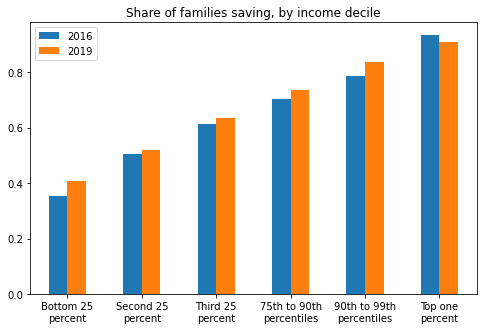

In [59]:
names = {'0-25': 'Bottom 25\npercent',
         '25-50': 'Second 25\npercent',
         '50-75': 'Third 25\npercent',
         '75-90': '75th to 90th\npercentiles',
         '90-99': '90th to 99th\npercentiles',
         '99-100': 'Top one\npercent'}
title = 'Share of families saving, by income decile'
result.rename(names).plot(kind='bar', title=title, rot=0, figsize=(8, 5));